In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

In [4]:
confirmed_df = pd.read_csv(confirmed_url, error_bad_lines=False)
recovered_df = pd.read_csv(recovered_url, error_bad_lines=False)

In [5]:
post_con_df = confirmed_df.groupby("Country/Region").sum().T.drop(['Lat', 'Long']).rename_axis('Date', axis=1)
post_rec_df = recovered_df.groupby("Country/Region").sum().T.drop(['Lat', 'Long']).rename_axis('Date', axis=1)

In [6]:
post_con_df = post_con_df.sub(post_con_df.shift()).iloc[1:]

In [7]:
post_rec_df = post_rec_df.sub(post_rec_df.shift()).iloc[1:]

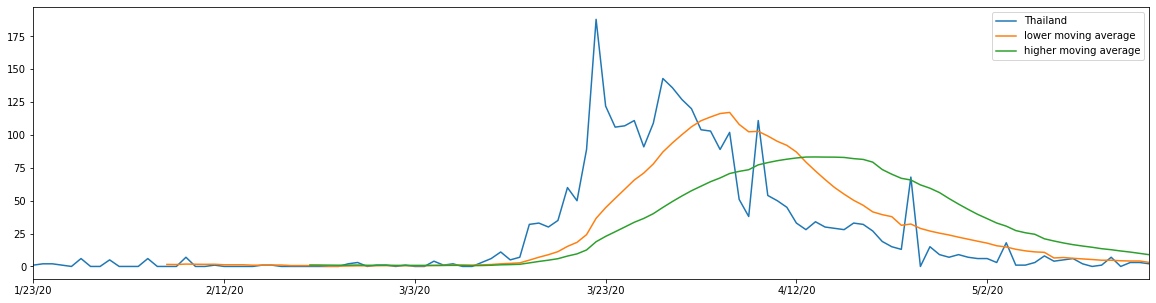

In [8]:
post_con_df['Thailand'].plot(figsize=(20,5))
post_con_df['Thailand'].rolling(window=15).mean().plot(label='lower moving average')
post_con_df['Thailand'].rolling(window=30).mean().plot(label='higher moving average')
plt.legend()

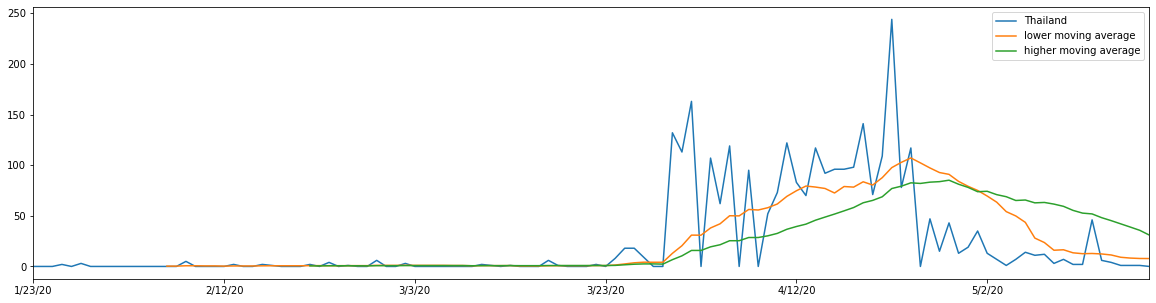

In [9]:
post_rec_df['Thailand'].plot(figsize=(20,5))
post_rec_df['Thailand'].rolling(window=15).mean().plot(label='lower moving average')
post_rec_df['Thailand'].rolling(window=30).mean().plot(label='higher moving average')
plt.legend()